## Final Project Submission

Please fill out:
* Student name: Thomas Brown
* Student pace: Full Time
* Scheduled project review date/time: tbd
* Instructor name: Abhineet Kulkarni
* Blog post URL: tbd


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Importing Data:

Let's import the csv file into a Pandas dataframe  and look at the first few rows as well as the basic meta-data.

In [2]:
df = pd.read_csv('kc_house_data.csv')
display(df.head())
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

## Exploring Data:

### Columns:

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Here's a list of the columns in the dataframe:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Data Cleaning:

Right off the bat, we see that the following columns will need to be cleaned:
- __Waterfront__
- __View__
- __Year Renovated__

In [4]:
# Shows number of null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Waterfront:

In [5]:
display(df['waterfront'].unique())
nulls1 = df['waterfront'].isna().sum()
print (f"{nulls1} null values in 'Waterfront'")
# Let's replace NaNs with 0s.  No further cleaning needed, this makes it a perfect dummy variable. 
# Given there are over 2,000 null values, I think it's safe to say these are meant to be 0s (not waterfront).

array([nan,  0.,  1.])

2376 null values in 'Waterfront'


In [6]:
# Replacing the nulls with 0s. 
df['waterfront'].fillna(0, inplace = True)
# Verifying that it worked
df['waterfront'].unique()

array([0., 1.])

### View:

In [7]:
# Identifying the issue. . . (If code has already been run, null won't appear)
display(df['view'].unique())
nulls2 = df['view'].isna().sum()
print (f"{nulls2} null values in 'View'")
# Only 63 null values to deal with.  
# Null values here should likely just be replaced with 0 as well

array([ 0., nan,  3.,  4.,  2.,  1.])

63 null values in 'View'


In [8]:
# Let's start by replacing the nulls with 0.
df['view'].fillna(0, inplace = True)

In [9]:
# Just to be safe, I'm also making a new column, just to see whether or not a house has been viewed at all.
df['has_view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

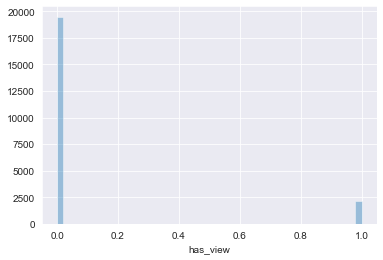

In [10]:
# It's strange that so many houses have 0 views. . . 
sns.distplot(df.has_view, kde = False)

### Year Renovated:

Here, we have 3,842 values to replace. Given we have a 0 value, I think it's safe to replace the nulls with 0s. These represent houses that have not been renovated.

In [11]:
display(df['yr_renovated'].unique())
nulls3 = df['yr_renovated'].isna().sum()
print (f"{nulls3} null values in 'Year Renovated'")

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

3842 null values in 'Year Renovated'


In [12]:
df.yr_renovated.value_counts()
# Vast majority of houses have not seen renovations.

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

__We have a couple things to do here:__
- We need to replace the null values with 0s.  I think it's safe to assume that nulls, have not been renovated.
    - If it were a more significant portion of the total houses listed (~22k) I would likely use a more <br>
    elegant solution such replacing nulls with year built + average time from build to remodel.
    - For now, though, I'm assuming these houses have not been remodeled.
- Second, I don't want to lose the year renovated, but I also need a dummy variable for is renovated or not. <br>
As such, I'll start with making a new column, "has_been_renovated" where 0 is "no renovation" and 1 is "has been renovated"

In [13]:
# Let's start by tackling those nulls and then making a dummy variable:
df['yr_renovated'].fillna(0, inplace = True)
df['has_ren'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_view,has_ren
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,1


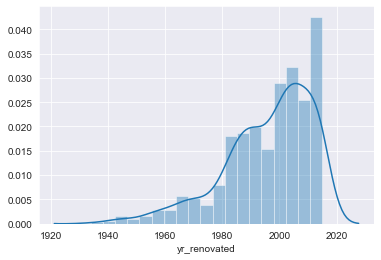

In [14]:
# Histogram of renovation for homes that have seen a renovation.
dftest = df[df['yr_renovated'] > 1]
sns.distplot(dftest.yr_renovated);

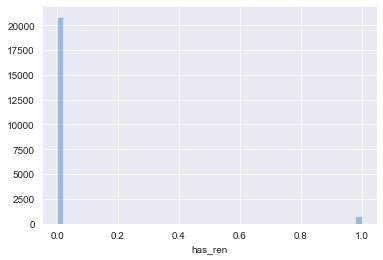

In [15]:
# Histogram showing proportion of homes that have been renovated.
sns.distplot(df.has_ren, kde = False);

In [16]:
# Only 744 renovations overall
df.has_ren.value_counts()

0    20853
1      744
Name: has_ren, dtype: int64

### SquareFeet Basement:

If you look closely, you'll see a value listed as '?' listed below.  We'll need to replace those with 0s!
We'll also want to convert this to an int value when complete.
<br>We'll want a dummy variable here as well to deal with the large majority of 0s in the distribution.

In [17]:
# Here, we're replacing the '?' with a 0, then converting all values to int
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x == '?' else x)
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [18]:
# Creating a dummy variable to deal with the 0 biased basement issue
df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_view,has_ren,has_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,1,1


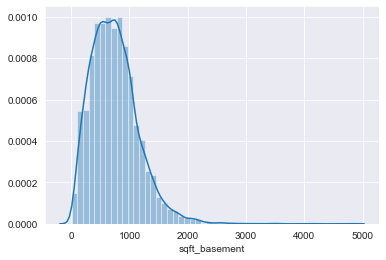

In [19]:
# Histogram of basement square feet for homes with basements.
dftest2 = df[df['sqft_basement'] > 1]
sns.distplot(dftest2.sqft_basement);

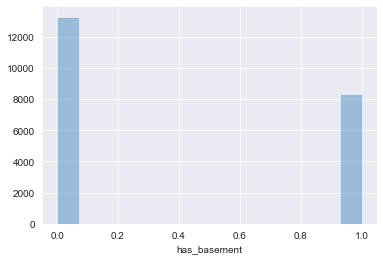

In [20]:
# Dummy variable below.  Now we can simply see if having a basement adds value.
sns.distplot(df.has_basement, kde = False);

### Grade:

In [21]:
df['grade'].unique()
# Strange, it appears to be a scale from 3 to 13.  By subracting 3 from all, we can normalize the scale.

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [22]:
# 0 through 10.  Much better.
df['grade'] = df['grade'].map(lambda x: x - 3)
df['grade'].unique()

array([ 4,  3,  5,  8,  6,  2,  7,  9,  1,  0, 10])

### Date:

Here, I simply changed the format so it can be read more easily later on.

In [23]:
df['date'] = pd.to_datetime(df['date'])

Let's also add a column for month sold.  This will be useful later.

In [183]:
df['month']= pd.DatetimeIndex(df['date']).month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,has_view,has_ren,has_basement,city,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,0,0,0,Renton,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,0,1,1,N Seattle,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,0,0,0,North KC,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,0,0,1,W Seattle,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,0,0,0,Sammamish,2


## Importing City Data:

In [24]:
# Data collected from a variety of sources, parsed in excel, and uploaded here.
cities = pd.read_csv('zip_code_data_ii.csv')
cities.drop(columns = 'Unnamed: 2', axis = 1, inplace = True)
cities.drop(columns = 'Unnamed: 3', axis = 1, inplace = True)
cities.head()

,zip,city
0,98002,South KC
1,98092,South KC
2,98224,East Side
3,98004,Bellevue
4,98005,Bellevue


In [27]:
# Appears to be working
df = df.join(cities.set_index('zip'), on = 'zipcode', how = 'left')
display(df.head(3))
num_cities = cities['city'].nunique()
print(f'{num_cities} unique cities/areas')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_view,has_ren,has_basement,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,0,0,0,Renton
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,0,1,1,N Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,98028,47.7379,-122.233,2720,8062,0,0,0,North KC


16 unique cities/areas


In [29]:
# So far so good.  This should help our model later on.
df['city'].unique()

array(['Renton', 'N Seattle', 'North KC', 'W Seattle', 'Sammamish',
       'East Side', 'Federal Way', 'South KC', 'Bellevue',
       'Mercer Island', 'Kent', 'Seattle', 'Burien', 'Vashon', 'Kirkland',
       'Medina'], dtype=object)

## Removing Outliers:

In [31]:
# Here, we'll be removing rows that are outside 3 standard deviations.
# This will help our model, as outliers can heavily skew models.
# We need to be careful to not remove outliers from things such as zip-code, though.
import scipy.stats as stats
for col in ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 
            'yr_built', 'sqft_above', 'sqft_living15', 'sqft_lot15']:
    df.drop(df.loc[np.abs(stats.zscore(df[col]))>3].index, axis=0, inplace=True)
df.info()
# We dropped around 1.5k outliers, but this should help our model later on.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20064 entries, 0 to 21596
Data columns (total 25 columns):
id               20064 non-null int64
date             20064 non-null datetime64[ns]
price            20064 non-null float64
bedrooms         20064 non-null int64
bathrooms        20064 non-null float64
sqft_living      20064 non-null int64
sqft_lot         20064 non-null int64
floors           20064 non-null float64
waterfront       20064 non-null float64
view             20064 non-null float64
condition        20064 non-null int64
grade            20064 non-null int64
sqft_above       20064 non-null int64
sqft_basement    20064 non-null float64
yr_built         20064 non-null int64
yr_renovated     20064 non-null float64
zipcode          20064 non-null int64
lat              20064 non-null float64
long             20064 non-null float64
sqft_living15    20064 non-null int64
sqft_lot15       20064 non-null int64
has_view         20064 non-null int64
has_ren          20064 non-n

# Exploratory Data Analysis:

## Q1: 

Idea: Map of KC with heat over size of house relative to price. . .

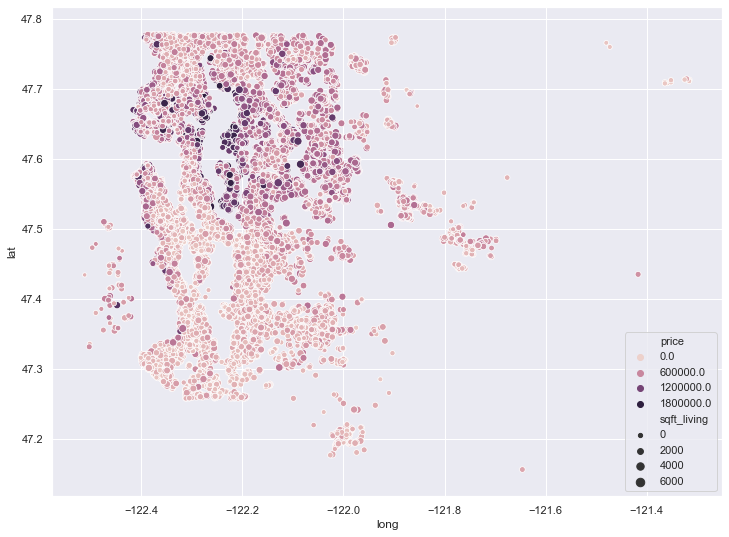

In [33]:
ax = sns.scatterplot(data = df, x = 'long',y = 'lat', hue = 'price', 
                     size = 'sqft_living')
sns.set(rc={'figure.figsize':(12,9)})
# Need to figure out the color min/max.  Also would be awesome to set this over an actual map.

### Folium Map:

Here, we'll use a more sophisticated mapping library to see housing prices  in different areas.<br>
This can give us a good idea of where the most expensive areas are.

In [182]:
import folium

kc_coord = (47.6062, -122.335167)
max_records = 300 # Keeps it running quickly for now
# Creating an empty map
map = folium.Map(location = kc_coord, zoom_start = 11, tiles='Cartodb Positron')

# Adding markers:
'''ADJUST CODE LATER'''
from folium.plugins import HeatMap
HeatMap(data=df[['lat', 'long', 'price']].\
        groupby(['lat', 'long']).sum().reset_index().\
        values.tolist(), radius=7.5).add_to(map)

# NOT WORKING FOR NOW
#for each in df[0:max_records].iterrows():
#    folium.map.Marker(location = [each[1]['lat'],each[1]['long']], clustered_marker = True)
  
display(map)

In [181]:
kc_coord = (47.6062, -122.335167)
max_records = 300 # Keeps it running quickly for now
# Creating an empty map
map = folium.Map(location = kc_coord, zoom_start = 11, tiles='Cartodb Positron')

# Adding markers:
'''ADJUST CODE LATER'''
from folium.plugins import HeatMap
HeatMap(data=df[['lat', 'long', 'sqft_living']].\
        groupby(['lat', 'long']).sum().reset_index().\
        values.tolist(), radius=7.5).add_to(map)

# NOT WORKING FOR NOW
#for each in df[0:max_records].iterrows():
#    folium.map.Marker(location = [each[1]['lat'],each[1]['long']], clustered_marker = True)
  
display(map)

## Q2:

Idea: Best time to sell by area.  Split Seattle into grouped zips.

Steps:
- Create column with month
- histogram on month sold vs price
- find a way to find out ceteres paribus if month affects things

## Q3:

Idea:  Demand for house size by area over time. . . 

# Feature Engineering:

## Multicollinearity:

Multicollinearity is an issue that can lead to a broken regression result when two explanatory variables are too highly correlated for the model to tell which is the driving in terms of the result.

In [38]:
# Checking to see if any potential explanitory variables are highly correlated.
# Anything over .75 will be addressed/removed.
# This chart is a bit unwieldy, but we will look at a simpler version below. 
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_view,has_ren,has_basement
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
condition,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


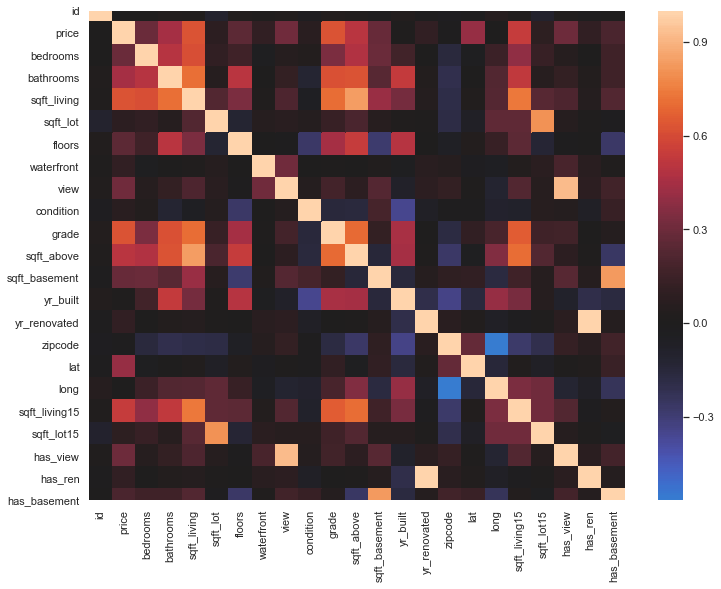

In [39]:
# Heatmap for quick visualization.
sns.heatmap(df.corr(), center=0);

The above chart is a bit messy. We're just searching for values correlated more strongly than .75. Let's simplify it by using a new color scheme, where the color only becomes brighter after a correlation stronger than .75.

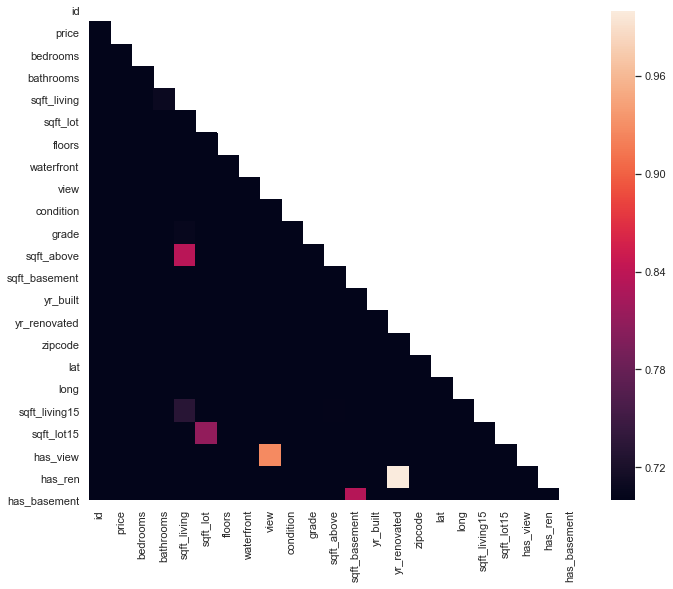

In [40]:
sns.set_style('white')
f, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(df.corr(), vmin=0.7, mask = mask);

Much better! From the above chart, we see that we should take the following actions:
- Only use the one hot encoded variables, not the original values they're derived from
    - For example, use "has_view" instead of "view"
- Use sqft_living instead of sqft_living15 or sqft_above. These are all highly correlated, but sqft_living is the most basic version of all these variables.

## Categorical vs. Continuous:

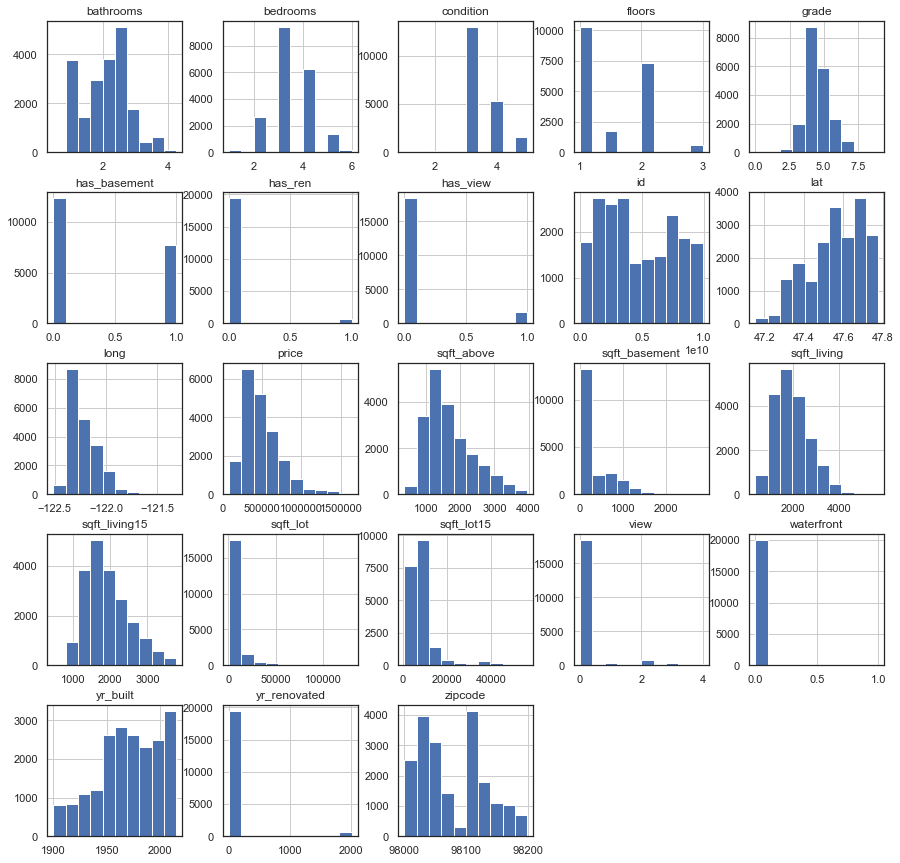

In [41]:
# Histogram to explore normality.  This is a basic eyeball test.
# Many of the values appear skewed or zero biased.
df.hist(figsize=(15,15));

In [ ]:
'''
EXAMPLE CODE FROM LESSON:
continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']
'''

### Categorical:

These categorical values I'll be using have already been one hot encoded.

In [189]:
cat = ['has_basement', 'has_view', 'has_ren', 'waterfront', 'grade', 
       'condition', 'bedrooms', 'floors', 'id', 'zipcode', 'city']
df_cat = df[cat]

#### One Hot Encoding:

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [190]:
#Bedrooms
df_cat['bed1'] = df_cat['bedrooms'].map(lambda x: 1 if x == 1 else 0)
df_cat['bed2'] = df_cat['bedrooms'].map(lambda x: 1 if x == 2 else 0)
df_cat['bed3'] = df_cat['bedrooms'].map(lambda x: 1 if x == 3 else 0)
df_cat['bed4'] = df_cat['bedrooms'].map(lambda x: 1 if x == 4 else 0)
df_cat['bed5plus'] = df_cat['bedrooms'].map(lambda x: 1 if x > 4 else 0)
df_cat.drop(columns='bedrooms', axis=1, inplace = True)

In [191]:
#Condition
df_cat['con2minus'] = df_cat['condition'].map(lambda x: 1 if x < 3 else 0)
df_cat['con3'] = df_cat['condition'].map(lambda x: 1 if x == 3 else 0)
df_cat['con4'] = df_cat['condition'].map(lambda x: 1 if x == 4 else 0)
df_cat['con5'] = df_cat['condition'].map(lambda x: 1 if x == 5 else 0)
df_cat.drop(columns='condition', axis=1, inplace = True)

In [192]:
#Floors
df_cat['1floor'] = df_cat['floors'].map(lambda x: 1 if x == 1 else 0)
df_cat['2floors'] = df_cat['floors'].map(lambda x: 1 if x == 2 else 0)
df_cat['3plusfloors'] = df_cat['floors'].map(lambda x: 1 if x > 2 else 0)
df_cat.drop(columns='floors', axis=1, inplace = True)

In [193]:
#Grade
df_cat['grade0to3'] = df_cat['grade'].map(lambda x: 1 if x < 4 else 0)
df_cat['grade4'] = df_cat['grade'].map(lambda x: 1 if x == 4 else 0)
df_cat['grade5'] = df_cat['grade'].map(lambda x: 1 if x == 5 else 0)
df_cat['grade6'] = df_cat['grade'].map(lambda x: 1 if x == 6 else 0)
df_cat['grade7plus'] = df_cat['grade'].map(lambda x: 1 if x > 6 else 0)
df_cat.drop(columns = 'grade', axis = 1, inplace = True)

In [194]:
#Season
df_cat['spring'] = df['month'].map(lambda x: 1 if x < 6 and x > 2 else 0) 
df_cat['summer'] = df['month'].map(lambda x: 1 if x < 9 and x > 5 else 0) 
df_cat['fall'] = df['month'].map(lambda x: 1 if x < 12 and x > 8 else 0) 

In [195]:
# Do not run again if already run
ohe_to_drop = ['bed1', 'con2minus', '1floor', 'grade0to3']
df_cat.drop(columns = ohe_to_drop, axis = 1, inplace = True)

In [196]:
df_cat.columns

Index(['has_basement', 'has_view', 'has_ren', 'waterfront', 'id', 'zipcode',
       'city', 'bed2', 'bed3', 'bed4', 'bed5plus', 'con3', 'con4', 'con5',
       '2floors', '3plusfloors', 'grade4', 'grade5', 'grade6', 'grade7plus',
       'spring', 'summer', 'fall'],
      dtype='object')

In [197]:
df_cat.head()

,has_basement,has_view,has_ren,waterfront,id,zipcode,city,bed2,bed3,bed4,...,con5,2floors,3plusfloors,grade4,grade5,grade6,grade7plus,spring,summer,fall
0,0,0,0,0.0,7129300520,98178,Renton,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,1,0.0,6414100192,98125,N Seattle,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0.0,5631500400,98028,North KC,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0.0,2487200875,98136,W Seattle,0,0,1,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0.0,1954400510,98074,Sammamish,0,1,0,...,0,0,0,0,1,0,0,0,0,0


#### Zip Codes:

In [198]:
#OHE - Dropping Kent to avoid Dummy Variable Trap
df_cat_city_ii = pd.get_dummies(df['city'])
df_cat_city_ii.drop(columns = 'Kent', axis = 1, inplace = True)
df_cat_city_ii.head()

,Bellevue,Burien,East Side,Federal Way,Kirkland,Medina,Mercer Island,N Seattle,North KC,Renton,Sammamish,Seattle,South KC,Vashon,W Seattle
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


##### ZIP CODE FINAL DF

** THIS IS THE FINAL SOURCE OF TRUTH FOR DUMMY VARIABLES WITH FIRST COLUMNS DROPPED FOR CATEGORICAL DATA **

In [199]:
cat_city = pd.concat([df_cat, df_cat_city_ii], axis=1)
cat_city.drop(columns = 'city', axis = 1, inplace = True)
cat_city.drop(columns = 'zipcode', axis = 1, inplace = True)
cat_city.drop(columns = 'id', axis = 1, inplace = True)
display(cat_city.head())
cat_city.info()

,has_basement,has_view,has_ren,waterfront,bed2,bed3,bed4,bed5plus,con3,con4,...,Medina,Mercer Island,N Seattle,North KC,Renton,Sammamish,Seattle,South KC,Vashon,W Seattle
0,0,0,0,0.0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20064 entries, 0 to 21596
Data columns (total 35 columns):
has_basement     20064 non-null int64
has_view         20064 non-null int64
has_ren          20064 non-null int64
waterfront       20064 non-null float64
bed2             20064 non-null int64
bed3             20064 non-null int64
bed4             20064 non-null int64
bed5plus         20064 non-null int64
con3             20064 non-null int64
con4             20064 non-null int64
con5             20064 non-null int64
2floors          20064 non-null int64
3plusfloors      20064 non-null int64
grade4           20064 non-null int64
grade5           20064 non-null int64
grade6           20064 non-null int64
grade7plus       20064 non-null int64
spring           20064 non-null int64
summer           20064 non-null int64
fall             20064 non-null int64
Bellevue         20064 non-null uint8
Burien           20064 non-null uint8
East Side        20064 non-null uint8
Federal Way    

In [200]:
# Now we need to drop, city, zipcode, and id
df_cat.drop(columns = 'city', axis = 1, inplace = True)
df_cat.drop(columns = 'zipcode', axis = 1, inplace = True)
df_cat.drop(columns = 'id', axis = 1, inplace = True)
display(df_cat.head())
df_cat.info()

,has_basement,has_view,has_ren,waterfront,bed2,bed3,bed4,bed5plus,con3,con4,con5,2floors,3plusfloors,grade4,grade5,grade6,grade7plus,spring,summer,fall
0,0,0,0,0.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,0,1,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20064 entries, 0 to 21596
Data columns (total 20 columns):
has_basement    20064 non-null int64
has_view        20064 non-null int64
has_ren         20064 non-null int64
waterfront      20064 non-null float64
bed2            20064 non-null int64
bed3            20064 non-null int64
bed4            20064 non-null int64
bed5plus        20064 non-null int64
con3            20064 non-null int64
con4            20064 non-null int64
con5            20064 non-null int64
2floors         20064 non-null int64
3plusfloors     20064 non-null int64
grade4          20064 non-null int64
grade5          20064 non-null int64
grade6          20064 non-null int64
grade7plus      20064 non-null int64
spring          20064 non-null int64
summer          20064 non-null int64
fall            20064 non-null int64
dtypes: float64(1), int64(19)
memory usage: 3.2 MB


### Continuous:

These may need to be log transformed for normality.

In [60]:
con = ['bathrooms', 'sqft_living', 'yr_built']
df_con = df[con]

#### Log and Other Transformations:

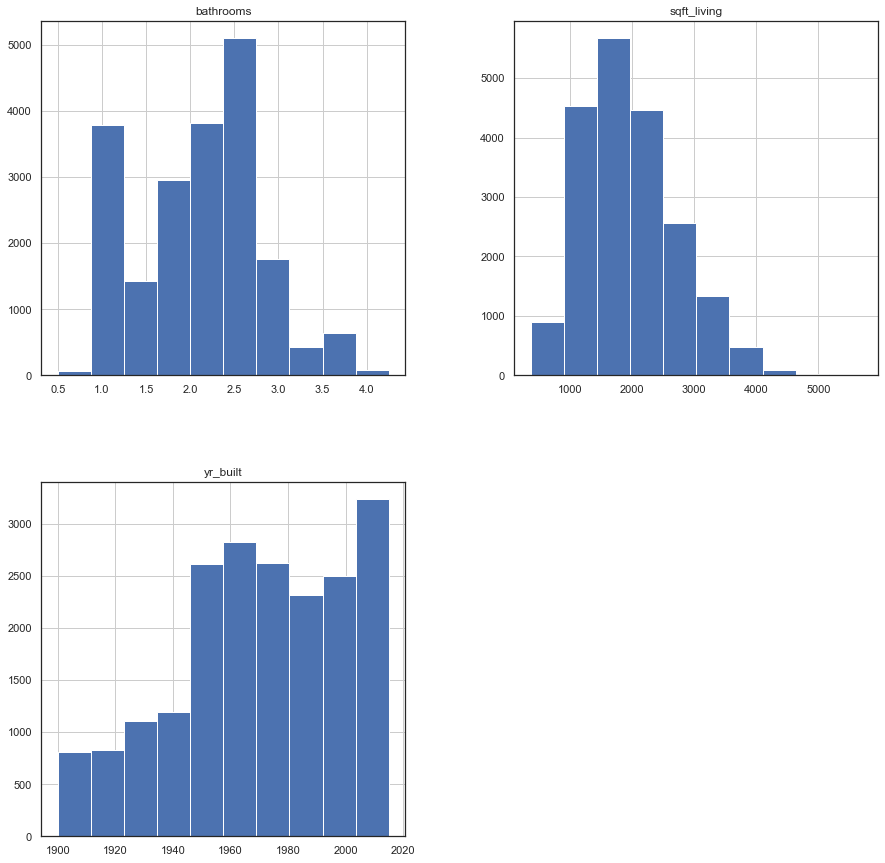

In [61]:
# Histogram to explore normality.  This is a basic eyeball test.
# Many of the values appear skewed or zero biased.
df_con.hist(figsize=(15,15));

In [62]:
# Log Transform
log_names = [f'{column}_log' for column in df_con.columns]

df_log = np.log(df_con)
df_log.columns = log_names

# Normalize

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

display(df_log.head(2))
display(df_log_norm.head(2))

,bathrooms_log,sqft_living_log,yr_built_log
0,0.00000,7.073270,7.578145
1,0.81093,7.851661,7.576097


,bathrooms_log,sqft_living_log,yr_built_log
0,-1.715030,-1.109079,-0.508032
1,0.427326,0.876842,-0.644878


Log Transformations are a way of inducing normality from an otherwise not normally distributed set of data.

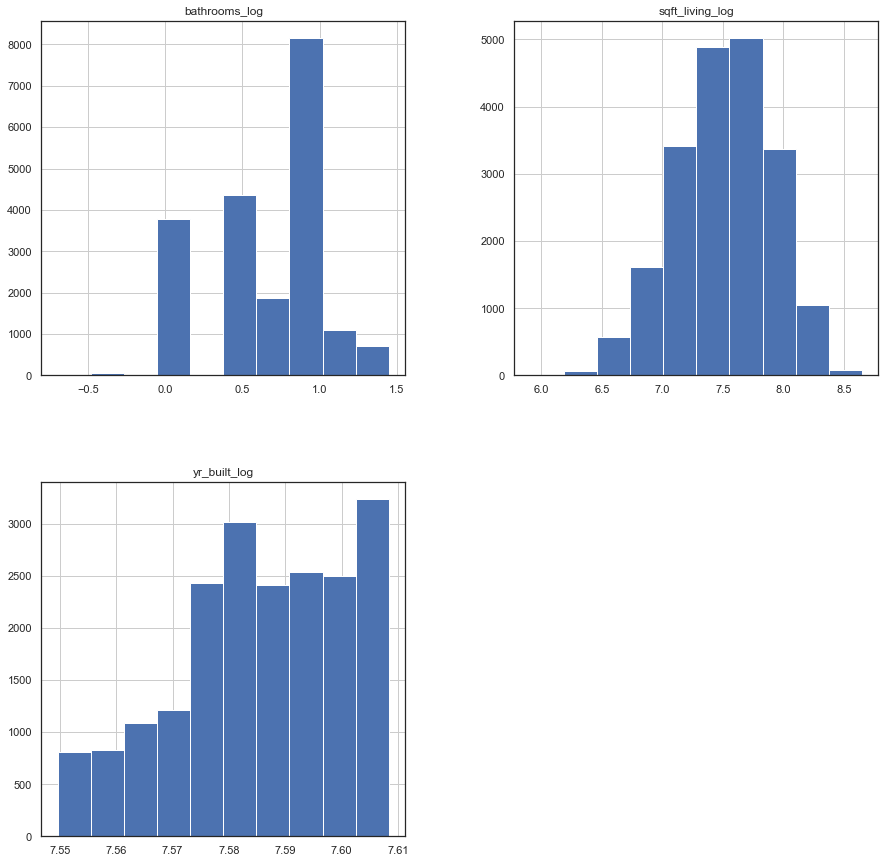

In [63]:
#Sqft living looks much more normal now.
df_log.hist(figsize=(15,15));

# Regression Models:

In [201]:
baseline_df = pd.concat([df_cat, df_con], axis=1)
feat_eng_df = pd.concat([df_log, cat_city], axis=1)
# Baseline
blX = baseline_df
# Baseline + Cities
city_X = pd.concat([df_con, cat_city], axis=1)
# Feature Engineering
logX = feat_eng_df
# Dependent variable is Price
y = df['price']

Importing Libraries:

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.preprocessing import LabelBinarizer

## Simple Linear Model:

Here, we'll start with a relatively simple model to explore the data and see which variables are the most significant with a regression.

It's important to have a simple model with few transformations or polynomial features in order to have a baseline to compare other models against.

### Linear Model 1:

In [202]:
# Model 1
# Name: model_base
# X: blX
model_base = sm.OLS(y,blX).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              8759.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:14:43   Log-Likelihood:                     -2.6954e+05
No. Observations:               20064   AIC:                                  5.391e+05
Df Residuals:                   20041   BIC:                                  5.393e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
has_basement  4.412e+04   2795.594     15.781      0.000    3.86e+04    4.96e+04
has_view      1.062e+05   4525.683     23.461      0.000    9.73e+04    1.15e+05
has_ren       1.209e+05   6650.554     18.180      0.000    1.08e+05    1.34e+05
waterfront    2.474e+05   2.07e+04     11.960      0.000    2.07e+05    2.88e+05
bed2          6.611e+04   1.25e+04      5.277      0.000    4.16e+04    9.07e+04
bed3          1.633e+04   1.25e+04      1.306      0.192   -8181.699    4.08e+04
bed4          1.159e+04   1.28e+04      0.905      0.365   -1.35e+04    3.67e+04
bed5plus      2.134e+04   1.36e+04      1.575      0.115   -5220.768    4.79e+04
con3          6.762e+04   1.25e+04      5.396      0.000    4.31e+04    9.22e+04
con4          1.114e+05   1.26e+04      8.872      0.000    8.68e+04    1.36e+05
con5          1.815e+05    1.3e+04     13.996      0.000    1.56e+05    2.07e+05
2floors      -1.403e+04   3464.240     -4.049      0.000   -2.08e+04   -7237.424
3plusfloors   6.556e+04   7027.071      9.329      0.000    5.18e+04    7.93e+04
grade4        6.901e+04   4286.898     16.099      0.000    6.06e+04    7.74e+04
grade5        1.586e+05   5100.121     31.099      0.000    1.49e+05    1.69e+05
grade6        3.065e+05   6526.854     46.954      0.000    2.94e+05    3.19e+05
grade7plus    4.485e+05   8561.697     52.380      0.000    4.32e+05    4.65e+05
spring        2.984e+04   3531.016      8.451      0.000    2.29e+04    3.68e+04
summer        9145.7617   3554.340      2.573      0.010    2178.962    1.61e+04
fall          6138.8617   3707.710      1.656      0.098   -1128.556    1.34e+04
bathrooms    -6892.1796   2846.539     -2.421      0.015   -1.25e+04   -1312.728
sqft_living    107.4321      3.035     35.398      0.000     101.483     113.381
yr_built         6.3291      8.759      0.723      0.470     -10.839      23.497
==============================================================================
Omnibus:                     3198.456   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8354.058
Skew:                           0.881   Prob(JB):                         0.00
Kurtosis:                       5.624   Cond. No.                     6.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__80/20 Split for Simple Linear Model:__

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(blX, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16051 4013 16051 4013


In [204]:
#Model 1
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Root Mean Squarred Error:', np.sqrt(mse_train))
print('Test Root Mean Squarred Error:', np.sqrt(mse_test))

Train Root Mean Squarred Error: 154776.61736512865
Test Root Mean Squarred Error: 155157.2940265863


### Interpreting Results:

This is a great start!  RMSE pretty large, but r2 is quite high.  Additionally, there's only a $500 dollar difference between the root mean squared error of the train and test data! This means that so far, we don't have to worry about over-fitting. Right now, our main concern is keeping the r2 high while reducing RMSE. 
<br>Let's now test the following:
- Do log transformed variables improve the r2?
- Would a polynomial regression help?
- Are there any interactions we can use?
- How does including geographic data help?

### Model Validity:

Heteroscedasticity, QQ Plots and more:

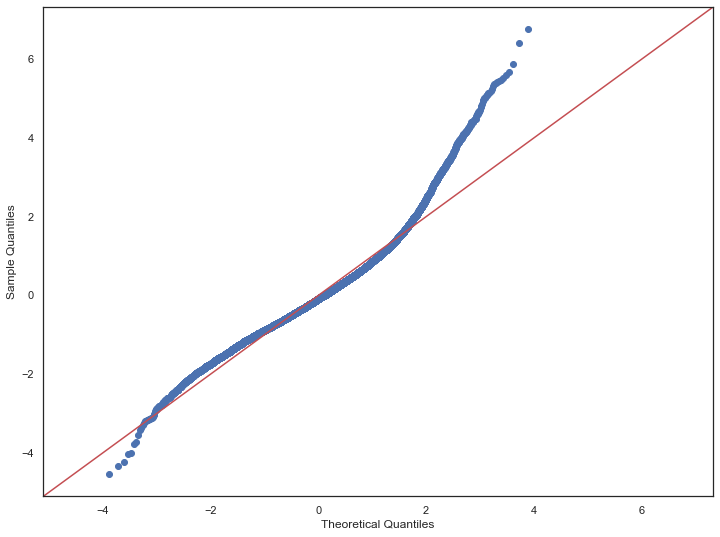

In [205]:
fig = sm.graphics.qqplot(model_base.resid, dist=stats.norm, line='45', fit=True)

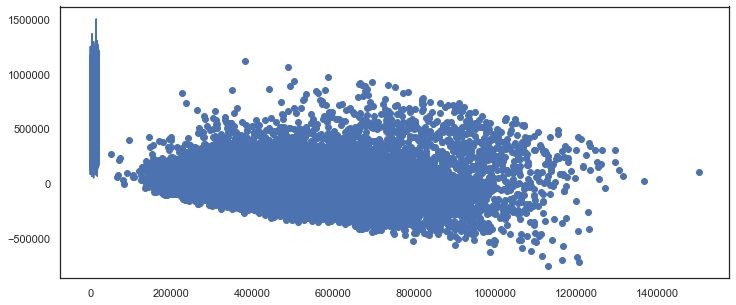

In [206]:
plt.figure(figsize=(12,5))
plt.scatter(model_base.predict(blX), model_base.resid)
plt.plot(model_base.predict(blX, [0 for i in range(len(blX))]))

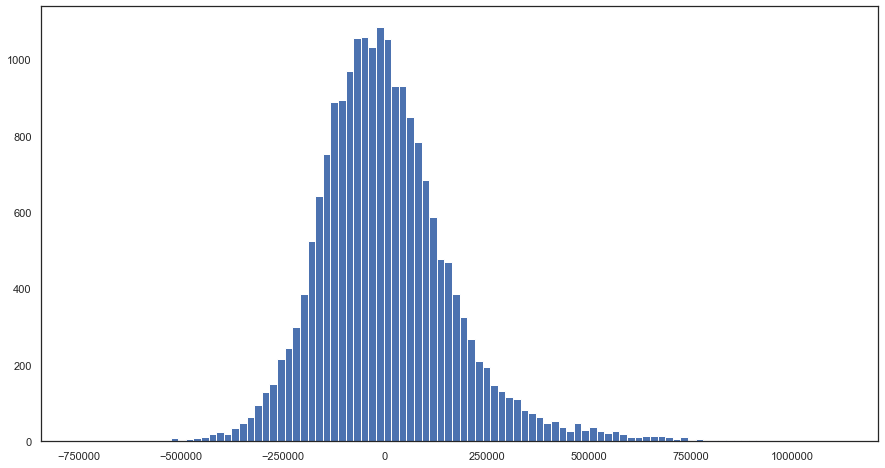

In [207]:
# Not perfect, but normal enough to not cause alarm.
plt.figure(figsize=(15,8))
plt.hist(model_base.resid, bins=100);

## Linear Model with Cities:

In [208]:
# Name: model_city
# X: city_X
model_city = sm.OLS(y, city_X).fit()
model_city.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              9582.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:15:18   Log-Likelihood:                     -2.6401e+05
No. Observations:               20064   AIC:                                  5.281e+05
Df Residuals:                   20026   BIC:                                  5.284e+05
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      6586.0825   2175.360      3.028      0.002    2322.198    1.08e+04
sqft_living     123.5762      2.338     52.866      0.000     118.994     128.158
yr_built        -55.7395      7.438     -7.494      0.000     -70.319     -41.160
has_basement  -8204.3178   2249.616     -3.647      0.000   -1.26e+04   -3794.885
has_view       9.938e+04   3481.177     28.547      0.000    9.26e+04    1.06e+05
has_ren        7.571e+04   5083.262     14.894      0.000    6.57e+04    8.57e+04
waterfront     3.467e+05    1.6e+04     21.666      0.000    3.15e+05    3.78e+05
bed2           3.367e+04   9524.279      3.535      0.000     1.5e+04    5.23e+04
bed3           2.727e+04   9503.064      2.870      0.004    8646.102    4.59e+04
bed4           2.076e+04   9736.875      2.132      0.033    1677.012    3.98e+04
bed5plus       4683.0813   1.03e+04      0.454      0.650   -1.55e+04    2.49e+04
con3           3.342e+04   9537.439      3.504      0.000    1.47e+04    5.21e+04
con4           6.709e+04   9550.026      7.025      0.000    4.84e+04    8.58e+04
con5           1.093e+05   9891.534     11.054      0.000       9e+04    1.29e+05
2floors       -1.756e+04   2680.476     -6.550      0.000   -2.28e+04   -1.23e+04
3plusfloors   -3.091e+04   5564.349     -5.554      0.000   -4.18e+04      -2e+04
grade4         3.341e+04   3290.281     10.153      0.000     2.7e+04    3.99e+04
grade5         1.027e+05   3937.053     26.085      0.000     9.5e+04     1.1e+05
grade6         2.161e+05   5057.398     42.720      0.000    2.06e+05    2.26e+05
grade7plus      3.25e+05   6684.368     48.617      0.000    3.12e+05    3.38e+05
spring         1.929e+04   2684.966      7.184      0.000     1.4e+04    2.46e+04
summer        -1538.1916   2702.267     -0.569      0.569   -6834.857    3758.474
fall          -5641.0791   2818.374     -2.002      0.045   -1.12e+04    -116.834
Bellevue       3.286e+05   7467.625     43.999      0.000    3.14e+05    3.43e+05
Burien         9.619e+04   9701.387      9.915      0.000    7.72e+04    1.15e+05
East Side      1.649e+05   6926.562     23.807      0.000    1.51e+05    1.78e+05
Federal Way   -1.082e+04   7908.595     -1.368      0.171   -2.63e+04    4682.002
Kirkland       2.588e+05   7680.939     33.692      0.000    2.44e+05    2.74e+05
Medina         8.274e+05   3.11e+04     26.564      0.000    7.66e+05    8.88e+05
Mercer Island  4.585e+05   1.07e+04     42.906      0.000    4.38e+05    4.79e+05
N Seattle      2.936e+05   6864.280     42.777      0.000     2.8e+05    3.07e+05
North KC       1.646e+05   7215.316     22.817      0.000     1.5e+05    1.79e+05
Renton         8.298e+04   7321.174     11.335      0.000    6.86e+04    9.73e+04
Sammamish      1.982e+05   8134.

In [209]:
# Train Test split for city linear model:
X_train2, X_test2, y_train2, y_test2 = train_test_split(city_X, y, test_size=0.2, random_state=42)
print(len(X_train2), len(X_test2), len(y_train2), len(y_test2))

16051 4013 16051 4013


In [210]:
linreg = LinearRegression()
linreg.fit(X_train2, y_train2)

y_hat_train2 = linreg.predict(X_train2)
y_hat_test2 = linreg.predict(X_test2)

train_residuals2 = y_hat_train2 - y_train2
test_residuals2 = y_hat_test2 - y_test2

mse_train = np.sum((y_train2-y_hat_train2)**2)/len(y_train2)
mse_test = np.sum((y_test2-y_hat_test2)**2)/len(y_test2)
print('Train Root Mean Squarred Error:', np.sqrt(mse_train))
print('Test Root Mean Squarred Error:', np.sqrt(mse_test))

Train Root Mean Squarred Error: 123648.84472725027
Test Root Mean Squarred Error: 121292.30884851255


### Linear City Model Notes:

- Huge improvement in r2, but RMSE is still a bit large
- So far best model, though

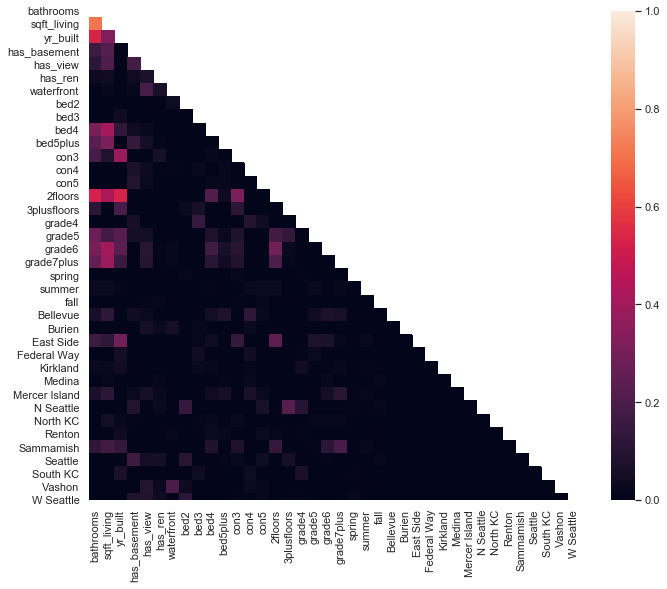

In [211]:
# Secondary Multicollinearity Check:
# No major issues!
sns.set_style('white')
f, ax = plt.subplots(figsize=(11, 9))
corr = city_X.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(city_X.corr(), vmin=0, mask = mask);

### QQ Plot:

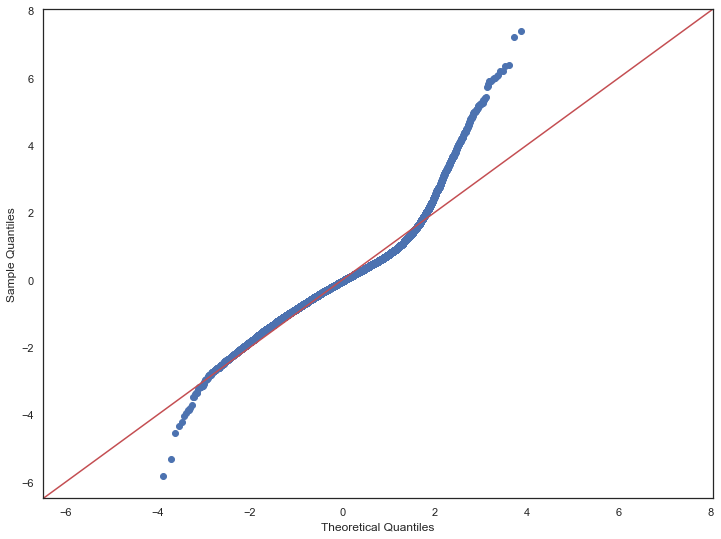

In [212]:
fig = sm.graphics.qqplot(model_city.resid, dist=stats.norm, line='45', fit=True)

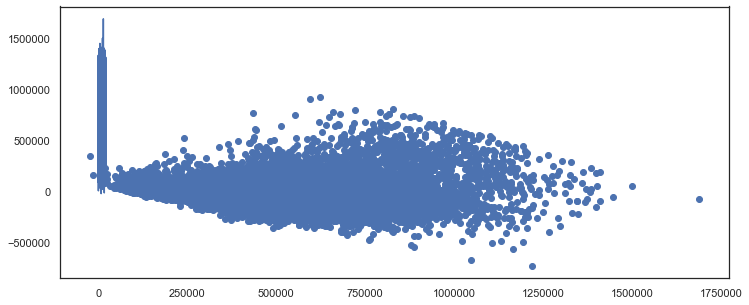

In [213]:
plt.figure(figsize=(12,5))
plt.scatter(model_city.predict(city_X), model_city.resid)
plt.plot(model_city.predict(city_X, [0 for i in range(len(city_X))]))

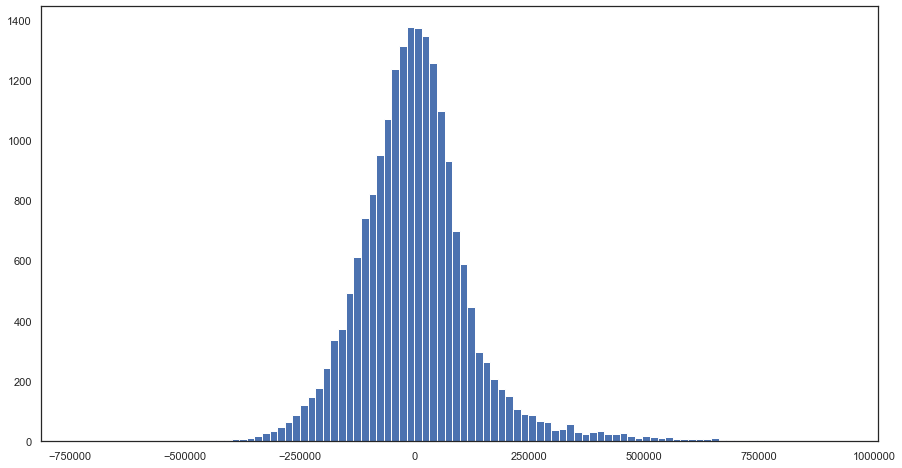

In [214]:
plt.figure(figsize=(15,8))
plt.hist(model_city.resid, bins=100);

## City Model 2.0 - Refinement:

We'll start by dropping 'bed5plus' as it was the least significant, and then move from there to refine further.

In [215]:
city_X_ii = city_X.drop(columns = 'bed5plus', axis = 1)

In [216]:
city_X_ii.drop(columns = 'Federal Way', axis = 1, inplace = True)

In [218]:
city_X_ii.drop(columns = 'summer', axis = 1, inplace = True)

In [219]:
# Name: model_city_ii
# X: city_X_ii
model_city_ii = sm.OLS(y, city_X_ii).fit()
model_city_ii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                          1.040e+04
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:17:15   Log-Likelihood:                     -2.6401e+05
No. Observations:               20064   AIC:                                  5.281e+05
Df Residuals:                   20029   BIC:                                  5.284e+05
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      6677.5336   2170.635      3.076      0.002    2422.910    1.09e+04
sqft_living     123.7988      2.282     54.251      0.000     119.326     128.272
yr_built        -58.2106      5.832     -9.981      0.000     -69.642     -46.779
has_basement  -8242.2980   2249.374     -3.664      0.000   -1.27e+04   -3833.339
has_view       9.928e+04   3478.708     28.538      0.000    9.25e+04    1.06e+05
has_ren        7.556e+04   5082.116     14.868      0.000    6.56e+04    8.55e+04
waterfront     3.465e+05    1.6e+04     21.662      0.000    3.15e+05    3.78e+05
bed2           2.984e+04   4495.977      6.636      0.000     2.1e+04    3.86e+04
bed3           2.322e+04   3576.033      6.494      0.000    1.62e+04    3.02e+04
bed4           1.661e+04   3467.887      4.791      0.000    9816.262    2.34e+04
con3            3.36e+04   9524.472      3.528      0.000    1.49e+04    5.23e+04
con4           6.724e+04   9531.576      7.054      0.000    4.86e+04    8.59e+04
con5           1.095e+05   9870.562     11.092      0.000    9.01e+04    1.29e+05
2floors       -1.749e+04   2672.798     -6.543      0.000   -2.27e+04   -1.23e+04
3plusfloors   -3.073e+04   5558.959     -5.527      0.000   -4.16e+04   -1.98e+04
grade4         3.357e+04   3279.749     10.237      0.000    2.71e+04       4e+04
grade5         1.027e+05   3936.070     26.086      0.000     9.5e+04     1.1e+05
grade6          2.16e+05   5055.830     42.717      0.000    2.06e+05    2.26e+05
grade7plus     3.246e+05   6672.949     48.650      0.000    3.12e+05    3.38e+05
spring         2.029e+04   2077.822      9.765      0.000    1.62e+04    2.44e+04
fall          -4668.5199   2246.510     -2.078      0.038   -9071.865    -265.174
Bellevue       3.358e+05   5264.923     63.774      0.000    3.25e+05    3.46e+05
Burien         1.033e+05   8142.369     12.691      0.000    8.74e+04    1.19e+05
East Side       1.72e+05   4476.356     38.417      0.000    1.63e+05    1.81e+05
Kirkland       2.659e+05   5573.350     47.715      0.000    2.55e+05    2.77e+05
Medina         8.345e+05   3.07e+04     27.183      0.000    7.74e+05    8.95e+05
Mercer Island  4.656e+05   9274.609     50.205      0.000    4.47e+05    4.84e+05
N Seattle      3.007e+05   4457.136     67.459      0.000    2.92e+05    3.09e+05
North KC       1.718e+05   4918.647     34.925      0.000    1.62e+05    1.81e+05
Renton         9.013e+04   5081.828     17.736      0.000    8.02e+04       1e+05
Sammamish      2.053e+05   6171.742     33.268      0.000    1.93e+05    2.17e+05
Seattle        3.145e+05   4687.064     67.091      0.000    3.05e+05    3.24e+05
South KC       3.803e+04   4347.706      8.748      0.000    2.95e+04    4.66e+04
Vashon         6.274e+04   1.64e

In [222]:
# Train Test split for city linear model:
X_train3, X_test3, y_train3, y_test3 = train_test_split(city_X_ii, y, test_size=0.2, random_state=42)
print(len(X_train3), len(X_test3), len(y_train3), len(y_test3))

16051 4013 16051 4013


In [223]:
linreg = LinearRegression()
linreg.fit(X_train3, y_train3)

y_hat_train3 = linreg.predict(X_train3)
y_hat_test3 = linreg.predict(X_test3)

train_residuals3 = y_hat_train3 - y_train3
test_residuals3 = y_hat_test3 - y_test3

mse_train = np.sum((y_train3-y_hat_train3)**2)/len(y_train3)
mse_test = np.sum((y_test3-y_hat_test3)**2)/len(y_test3)
print('Train Root Mean Squarred Error:', np.sqrt(mse_train))
print('Test Root Mean Squarred Error:', np.sqrt(mse_test))

Train Root Mean Squarred Error: 123680.12294139517
Test Root Mean Squarred Error: 121358.70434075882


The model is a bit cleaner, but no significant change.

### City Model 2.0 Results:

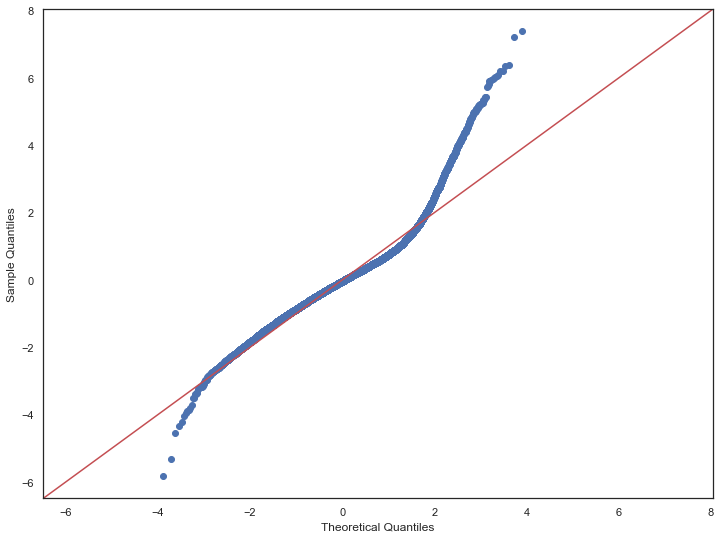

In [224]:
# QQ Plot:
fig = sm.graphics.qqplot(model_city_ii.resid, dist=stats.norm, line='45', fit=True)

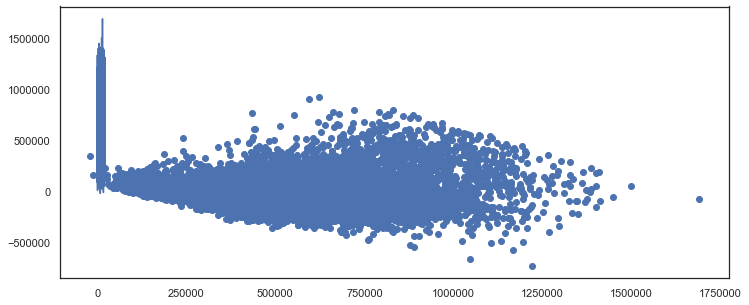

In [225]:
# Heteroskedascticity:
plt.figure(figsize=(12,5))
plt.scatter(model_city_ii.predict(city_X_ii), model_city_ii.resid)
plt.plot(model_city_ii.predict(city_X_ii, [0 for i in range(len(city_X_ii))]));

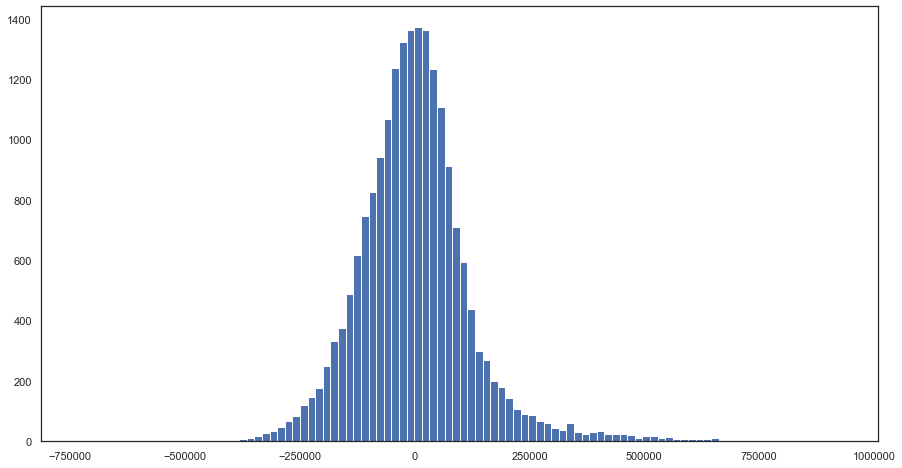

In [226]:
# Residual histogram:
plt.figure(figsize=(15,8))
plt.hist(model_city_ii.resid, bins=100);

## Multiple Regression with Transformations:

In [227]:
# Name: model_log
# X: logX
model_log = sm.OLS(y, logX).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              9429.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:17:58   Log-Likelihood:                     -2.6416e+05
No. Observations:               20064   AIC:                                  5.284e+05
Df Residuals:                   20026   BIC:                                  5.287e+05
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bathrooms_log   -7140.6966   4027.292     -1.773      0.076    -1.5e+04     753.128
sqft_living_log  2.366e+05   4636.797     51.028      0.000    2.28e+05    2.46e+05
yr_built_log    -2.012e+05   4469.354    -45.016      0.000    -2.1e+05   -1.92e+05
has_basement    -8413.8831   2286.660     -3.680      0.000   -1.29e+04   -3931.840
has_view         1.045e+05   3498.688     29.871      0.000    9.77e+04    1.11e+05
has_ren          7.592e+04   5118.398     14.832      0.000    6.59e+04    8.59e+04
waterfront       3.354e+05   1.61e+04     20.796      0.000    3.04e+05    3.67e+05
bed2            -1.789e+04   9663.494     -1.851      0.064   -3.68e+04    1051.455
bed3            -3.831e+04   9741.954     -3.933      0.000   -5.74e+04   -1.92e+04
bed4            -4.193e+04   1.01e+04     -4.167      0.000   -6.17e+04   -2.22e+04
bed5plus        -4.472e+04   1.06e+04     -4.209      0.000   -6.55e+04   -2.39e+04
con3              1.15e+04   9601.640      1.198      0.231   -7317.683    3.03e+04
con4              4.36e+04   9655.323      4.516      0.000    2.47e+04    6.25e+04
con5             8.775e+04      1e+04      8.753      0.000    6.81e+04    1.07e+05
2floors         -1.206e+04   2689.492     -4.483      0.000   -1.73e+04   -6785.673
3plusfloors     -2.412e+04   5611.842     -4.299      0.000   -3.51e+04   -1.31e+04
grade4           1.877e+04   3389.879      5.537      0.000    1.21e+04    2.54e+04
grade5           9.067e+04   4103.016     22.099      0.000    8.26e+04    9.87e+04
grade6           2.198e+05   5145.828     42.705      0.000     2.1e+05     2.3e+05
grade7plus       3.519e+05   6603.157     53.296      0.000    3.39e+05    3.65e+05
spring           1.818e+04   2705.895      6.719      0.000    1.29e+04    2.35e+04
summer          -2497.9650   2723.590     -0.917      0.359   -7836.426    2840.496
fall            -6404.5824   2840.645     -2.255      0.024    -1.2e+04    -836.684
Bellevue         3.197e+05   7552.233     42.328      0.000    3.05e+05    3.34e+05
Burien           8.632e+04   9805.193      8.804      0.000    6.71e+04    1.06e+05
East Side        1.559e+05   6988.359     22.315      0.000    1.42e+05     1.7e+05
Federal Way      -1.99e+04   7981.874     -2.493      0.013   -3.55e+04   -4255.119
Kirkland         2.503e+05   7757.896     32.265      0.000    2.35e+05    2.66e+05
Medina           8.175e+05   3.14e+04     26.037      0.000    7.56e+05    8.79e+05
Mercer Island    4.524e+05   1.08e+04     41.928      0.000    4.31e+05    4.74e+05
N Seattle         2.83e+05   6999.585     40.436      0.000    2.69e+05    2.97e+05
North KC         1.554e+05   7299.561     21.290      0.000    1.41e+05     1.7e+05
Renton           7.419e+04   7394.127     10

__Refining:__

In [228]:
logX_ii = logX.drop(columns = 'con3', axis = 1)

In [229]:
logX_ii.drop(columns = 'bed2', axis = 1, inplace = True)

In [230]:
logX_ii.drop(columns = 'bathrooms_log', axis = 1, inplace = True)

With these statistically insignificant variables cleared, we are ready to rebuild the model:

In [231]:
# Name: model_log_ii
# X: logX_ii
model_log_ii = sm.OLS(y, logX_ii).fit()
model_log_ii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          1.023e+04
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:18:08   Log-Likelihood:                     -2.6417e+05
No. Observations:               20064   AIC:                                  5.284e+05
Df Residuals:                   20029   BIC:                                  5.287e+05
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sqft_living_log  2.332e+05   4358.781     53.497      0.000    2.25e+05    2.42e+05
yr_built_log    -1.989e+05   4040.322    -49.221      0.000   -2.07e+05   -1.91e+05
has_basement    -9152.1986   2242.236     -4.082      0.000   -1.35e+04   -4757.232
has_view         1.047e+05   3498.178     29.938      0.000    9.79e+04    1.12e+05
has_ren          7.594e+04   5115.964     14.843      0.000    6.59e+04     8.6e+04
waterfront       3.361e+05   1.61e+04     20.846      0.000    3.05e+05    3.68e+05
bed3            -2.189e+04   3083.281     -7.098      0.000   -2.79e+04   -1.58e+04
bed4            -2.551e+04   3717.028     -6.862      0.000   -3.28e+04   -1.82e+04
bed5plus        -2.852e+04   4907.579     -5.811      0.000   -3.81e+04   -1.89e+04
con4             3.247e+04   2203.832     14.735      0.000    2.82e+04    3.68e+04
con5             7.614e+04   3498.308     21.765      0.000    6.93e+04     8.3e+04
2floors         -1.368e+04   2505.214     -5.459      0.000   -1.86e+04   -8765.102
3plusfloors     -2.679e+04   5405.466     -4.955      0.000   -3.74e+04   -1.62e+04
grade4            1.78e+04   3336.355      5.336      0.000    1.13e+04    2.43e+04
grade5           8.932e+04   4005.251     22.301      0.000    8.15e+04    9.72e+04
grade6           2.188e+05   5088.794     42.996      0.000    2.09e+05    2.29e+05
grade7plus       3.511e+05   6559.770     53.520      0.000    3.38e+05    3.64e+05
spring           1.822e+04   2705.714      6.735      0.000    1.29e+04    2.35e+04
summer          -2415.5322   2722.690     -0.887      0.375   -7752.229    2921.165
fall            -6305.0181   2840.005     -2.220      0.026   -1.19e+04    -738.375
Bellevue         3.197e+05   7551.908     42.336      0.000    3.05e+05    3.35e+05
Burien           8.638e+04   9800.883      8.814      0.000    6.72e+04    1.06e+05
East Side        1.558e+05   6988.027     22.302      0.000    1.42e+05     1.7e+05
Federal Way     -2.003e+04   7982.039     -2.510      0.012   -3.57e+04   -4386.175
Kirkland         2.502e+05   7758.220     32.246      0.000    2.35e+05    2.65e+05
Medina            8.18e+05   3.14e+04     26.050      0.000    7.56e+05     8.8e+05
Mercer Island    4.523e+05   1.08e+04     41.920      0.000    4.31e+05    4.73e+05
N Seattle        2.835e+05   6994.205     40.538      0.000     2.7e+05    2.97e+05
North KC         1.557e+05   7298.736     21.335      0.000    1.41e+05     1.7e+05
Renton           7.433e+04   7394.493     10.052      0.000    5.98e+04    8.88e+04
Sammamish        1.894e+05   8213.090     23.060      0.000    1.73e+05    2.05e+05
Seattle          2.951e+05   7153.669     41.249      0.000    2.81e+05    3.09e+05
South KC         2.079e+04   6904.002      3

In [232]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(logX_ii, y, test_size=0.2, random_state=42)
print(len(X_train4), len(X_test4), len(y_train4), len(y_test4))

16051 4013 16051 4013


In [233]:
linreg = LinearRegression()
linreg.fit(X_train4, y_train4)

y_hat_train4 = linreg.predict(X_train4)
y_hat_test4 = linreg.predict(X_test4)

train_residuals = y_hat_train4 - y_train4
test_residuals = y_hat_test4 - y_test4

mse_train = np.sum((y_train4 -y_hat_train4)**2)/len(y_train4)
mse_test = np.sum((y_test4 -y_hat_test4)**2)/len(y_test4)
print('Train Root Mean Squarred Error:', np.sqrt(mse_train))
print('Test Root Mean Squarred Error:', np.sqrt(mse_test))

Train Root Mean Squarred Error: 125120.16190724036
Test Root Mean Squarred Error: 123114.24120089419


### Interpreting Log Regression Results:

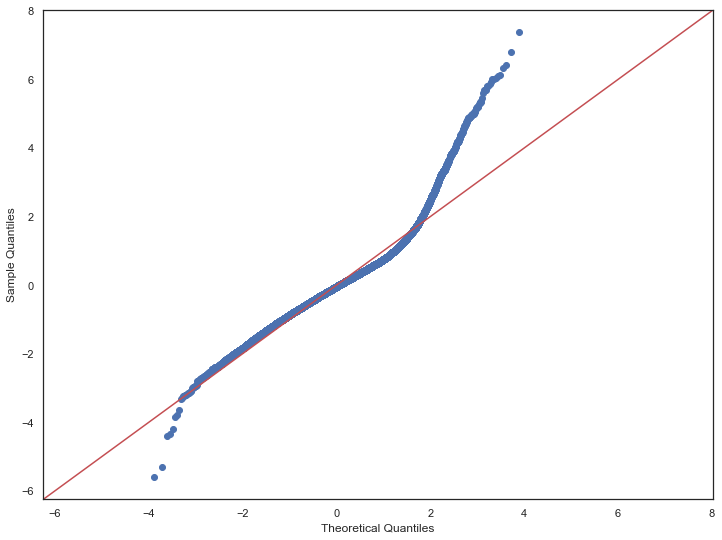

In [234]:
fig = sm.graphics.qqplot(model_log_ii.resid, dist=stats.norm, line='45', fit=True)

Not a step in the right direction. . . 
- RMSE is up
- r2 is down, albeit by a small amount
- Need to refine, get rid of some of the variables here
- Otherwise, doesn't seem much better than the other model

## Testing for Interactions:

### Interpreting Results:

## Polynomial Regression:

Can we get better results with a polynomial model?  Let's try some of our top explanatory variables squared. . .

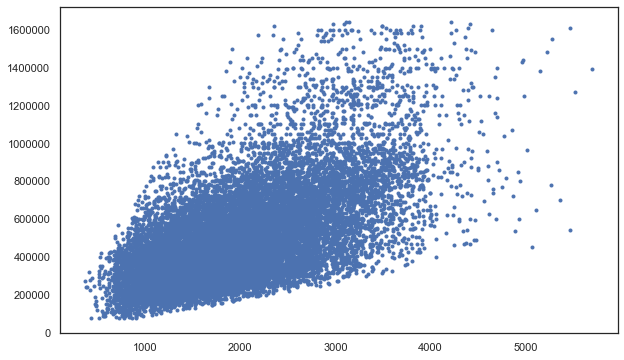

In [235]:
plt.figure(figsize=(10, 6))
plt.scatter(city_X_ii['sqft_living'], y, marker='.');

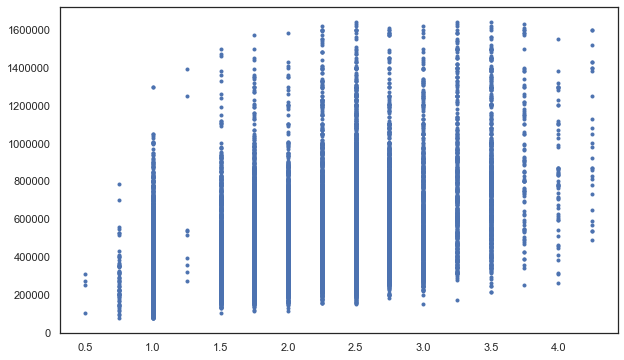

In [236]:
plt.figure(figsize=(10, 6))
plt.scatter(city_X_ii['bathrooms'], y, marker='.');
# Likely no need for polynomial model

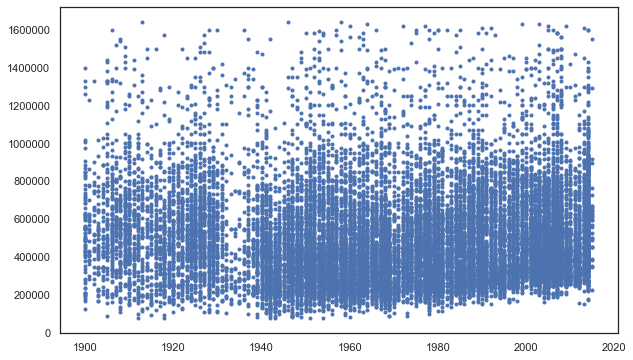

In [237]:
plt.figure(figsize=(10, 6))
plt.scatter(city_X_ii['yr_built'], y, marker='.');
# Likely no need for polynomial model
# Interesting to note how few houses were built in the Great Depression. . . 

In [238]:
city_X_iii = city_X_ii
city_X_iii['sqft_living_2'] = city_X_iii['sqft_living']**2
#city_X_iii = city_X.drop(columns = 'sqft_living', axis = 1)
#city_X_iii.info()

In [239]:
# Name: model_city_iii
# X: city_X_iii
# Notes: Similar model to the linear city model, but with sqft_living squared
model_city_iii = sm.OLS(y, city_X_iii).fit()
model_city_iii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                          1.012e+04
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:19:00   Log-Likelihood:                     -2.6401e+05
No. Observations:               20064   AIC:                                  5.281e+05
Df Residuals:                   20028   BIC:                                  5.284e+05
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      6130.3975   2179.334      2.813      0.005    1858.723    1.04e+04
sqft_living     142.0280      6.995     20.304      0.000     128.317     155.739
yr_built        -65.1276      6.348    -10.260      0.000     -77.570     -52.685
has_basement  -8915.6195   2262.227     -3.941      0.000   -1.33e+04   -4481.467
has_view       9.968e+04   3481.237     28.634      0.000    9.29e+04    1.07e+05
has_ren        7.525e+04   5082.526     14.806      0.000    6.53e+04    8.52e+04
waterfront     3.455e+05    1.6e+04     21.594      0.000    3.14e+05    3.77e+05
bed2           3.082e+04   4509.278      6.834      0.000     2.2e+04    3.97e+04
bed3           2.224e+04   3593.078      6.191      0.000    1.52e+04    2.93e+04
bed4           1.504e+04   3513.866      4.281      0.000    8154.593    2.19e+04
con3           3.293e+04   9525.985      3.457      0.001    1.43e+04    5.16e+04
con4           6.628e+04   9536.273      6.951      0.000    4.76e+04     8.5e+04
con5           1.085e+05   9875.910     10.982      0.000    8.91e+04    1.28e+05
2floors       -1.761e+04   2672.745     -6.591      0.000   -2.29e+04   -1.24e+04
3plusfloors   -3.002e+04   5563.933     -5.396      0.000   -4.09e+04   -1.91e+04
grade4         3.145e+04   3368.859      9.334      0.000    2.48e+04     3.8e+04
grade5         9.984e+04   4067.681     24.545      0.000    9.19e+04    1.08e+05
grade6         2.143e+05   5091.231     42.092      0.000    2.04e+05    2.24e+05
grade7plus      3.26e+05   6689.187     48.731      0.000    3.13e+05    3.39e+05
spring         2.029e+04   2077.480      9.766      0.000    1.62e+04    2.44e+04
fall          -4641.4093   2246.162     -2.066      0.039   -9044.072    -238.747
Bellevue       3.357e+05   5264.098     63.773      0.000    3.25e+05    3.46e+05
Burien         1.032e+05   8141.242     12.672      0.000    8.72e+04    1.19e+05
East Side      1.717e+05   4476.570     38.358      0.000    1.63e+05     1.8e+05
Kirkland       2.659e+05   5572.433     47.724      0.000    2.55e+05    2.77e+05
Medina          8.34e+05   3.07e+04     27.170      0.000    7.74e+05    8.94e+05
Mercer Island   4.66e+05   9273.849     50.245      0.000    4.48e+05    4.84e+05
N Seattle      3.008e+05   4456.500     67.487      0.000    2.92e+05    3.09e+05
North KC       1.716e+05   4918.443     34.883      0.000    1.62e+05    1.81e+05
Renton         8.997e+04   5081.323     17.706      0.000       8e+04    9.99e+04
Sammamish       2.05e+05   6171.824     33.215      0.000    1.93e+05    2.17e+05
Seattle        3.144e+05   4686.357     67.087      0.000    3.05e+05    3.24e+05
South KC       3.786e+04   4347.432      8.709      0.000    2.93e+04    4.64e+04
Vashon         6.211e+04   1.64e

In [240]:
# Train Test split for city polynomial model:
X_train5, X_test5, y_train5, y_test5 = train_test_split(city_X_iii, y, test_size=0.2, random_state=42)
print(len(X_train5), len(X_test5), len(y_train5), len(y_test5))

16051 4013 16051 4013


In [241]:
linreg = LinearRegression()
linreg.fit(X_train5, y_train5)

y_hat_train5 = linreg.predict(X_train5)
y_hat_test5 = linreg.predict(X_test5)

train_residuals5 = y_hat_train5 - y_train5
test_residuals5 = y_hat_test5 - y_test5

mse_train = np.sum((y_train5-y_hat_train5)**2)/len(y_train5)
mse_test = np.sum((y_test5-y_hat_test5)**2)/len(y_test5)
print('Train Root Mean Squarred Error:', np.sqrt(mse_train))
print('Test Root Mean Squarred Error:', np.sqrt(mse_test))

Train Root Mean Squarred Error: 123678.89703306663
Test Root Mean Squarred Error: 121358.39034417474


This model is statistically the same as what we had before with the other linear city model.

## Last Adjustments:

Seeing if we can squeeze out any sort of better model.

In [2]:
# Stepwise functions or recursion


# Final Model:

Additional charts and such. . . 

# Further Work To Do:

In the future, I'd love to explore the following features to try to squeeze out a better model:
- x
- y
- z

Zero in on houses that have been renovated.  How long until sale typically?  Do they tend to sell for higher values than similar non renovated homes?  etc. . . 

Idea: 
- Crime data
- Quality of kitchen

Idea: 

# Conclusion:

Based on my final regression model, I can make the following statements about house prices, ceteris paribus:
- one
- Renovations help a homes value quite a bit.  All else equal, by around $75,000.  This is valuable information both for those looking to sell their homes, and people looking to buy and flip homes.
- three


Thanks for reading!

-Thomas Brown